# Video Game Exploratory Data Analysis

### **Objective**: Explore to see what genres and games are most popular to gain a better understanding of what users enjoy or are most interested in playing.

Import libraries that will be used.

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import ast

Read in the dataset

In [101]:
df = pd.read_csv(r"C:\Data_Sets\Portfolio Project Data\Video Games\Video Games 1980-2023.csv")

### Cleaning up the dataset.
First is to remove the columns that are unneeded.

Then I can take a look a closer look at the data and see what needs cleaning.

In [102]:
df = df.drop(columns=['Unnamed: 0', 'Summary', 'Reviews'])
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,25-Feb-22,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
1,Hades,10-Dec-19,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,03-Mar-17,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
3,Undertale,15-Sep-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
4,Hollow Knight,24-Feb-17,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K


In [103]:
#Show the number of rows and columns
df.shape

(1512, 11)

In [104]:
#Show important info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Plays              1512 non-null   object 
 8   Playing            1512 non-null   object 
 9   Backlogs           1512 non-null   object 
 10  Wishlist           1512 non-null   object 
dtypes: float64(1), object(10)
memory usage: 130.1+ KB


Above we can see that the columns 'Team' and 'Rating' have null values in them.
I will start with 'Team' to see what the single null value is.

In [105]:
df[df['Team'].isna() == True]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
1245,NEET Girl Date Night,21-Oct-22,NaN,2.7,21,21,['Visual Novel'],106,1,44,42


After looking up the game online I can now fill in the studio that created this game, Hitsuji Goods.

In [106]:
df.at[1245, 'Team'] = "Hitsuji Goods"

In [107]:
df.loc[1245]

Title                NEET Girl Date Night
Release Date                    21-Oct-22
Team                        Hitsuji Goods
Rating                                2.7
Times Listed                           21
Number of Reviews                      21
Genres                   ['Visual Novel']
Plays                                 106
Playing                                 1
Backlogs                               44
Wishlist                               42
Name: 1245, dtype: object

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1512 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Plays              1512 non-null   object 
 8   Playing            1512 non-null   object 
 9   Backlogs           1512 non-null   object 
 10  Wishlist           1512 non-null   object 
dtypes: float64(1), object(10)
memory usage: 130.1+ KB


Now I will see what null values there are in the 'Rating' column.

In [109]:
df[df['Rating'].isna() == True]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,22-Jun-23,"['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",3,0,209,644
713,Final Fantasy VII Rebirth,31-Dec-23,['Square Enix'],NaN,192,192,[],20,3,354,1.1K
719,Lies of P,01-Aug-23,"['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],5,0,260,939
726,Judas,31-Mar-25,['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,31-Dec-23,"['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",2,1,145,588
972,The Legend of Zelda: Tears of the Kingdom,12-May-23,"['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",72,6,1.6K,5.4K
1130,Star Wars Jedi: Survivor,28-Apr-23,"['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],13,2,367,1.4K
1160,We Love Katamari Reroll + Royal Reverie,02-Jun-23,"['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",3,0,74,291
1202,Earthblade,31-Dec-24,['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']",0,1,103,529


I will fill in the null/NaN values with the median of that column.

So, first I will find the median, fill in the null values, and then double check with info()

In [110]:
df['Rating'].median()

3.8

In [111]:
df['Rating'] = df['Rating'].fillna(3.8)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1512 non-null   object 
 3   Rating             1512 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Plays              1512 non-null   object 
 8   Playing            1512 non-null   object 
 9   Backlogs           1512 non-null   object 
 10  Wishlist           1512 non-null   object 
dtypes: float64(1), object(10)
memory usage: 130.1+ KB


I will now convert all columns that contain numeric values from object to float. This will allow me to use these columns in my EDA.

In [114]:
#Defining a new function to make it easier. In several of the columns the values are in nK format. 
#I need to drop the K, multiple by 1000 to have the correct number, and converting the values in the column to the data type needed.
def dtype(x):
    y = x.split('K')
    return float(y[0])*1000 if len(y) == 2 else float(y[0])

In [115]:
df['Times Listed'] = df['Times Listed'].apply(dtype)
df['Number of Reviews'] = df['Number of Reviews'].apply(dtype)
df['Plays'] = df['Plays'].apply(dtype)
df['Playing'] = df['Playing'].apply(dtype)
df['Backlogs'] = df['Backlogs'].apply(dtype)
df['Wishlist'] = df['Wishlist'].apply(dtype)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1512 non-null   object 
 3   Rating             1512 non-null   float64
 4   Times Listed       1512 non-null   float64
 5   Number of Reviews  1512 non-null   float64
 6   Genres             1512 non-null   object 
 7   Plays              1512 non-null   float64
 8   Playing            1512 non-null   float64
 9   Backlogs           1512 non-null   float64
 10  Wishlist           1512 non-null   float64
dtypes: float64(7), object(4)
memory usage: 130.1+ KB


I can now use describe() to see helpful statistical information about these columns.

In [117]:
df.describe()

,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,3.720040,769.459656,769.459656,6253.578704,267.379630,1452.577381,780.540344
std,0.530364,687.840871,687.840871,5894.977122,426.453368,1341.971968,801.253431
min,0.700000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,3.400000,284.000000,284.000000,1800.000000,43.000000,461.750000,212.000000
50%,3.800000,551.000000,551.000000,4200.000000,112.500000,1000.000000,496.000000
75%,4.100000,1000.000000,1000.000000,9100.000000,298.000000,2100.000000,1100.000000
max,4.800000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,5400.000000


Next, I will check for duplicates in the dataset and delete the duplicates as they are not needed.

In [118]:
dup_count = df.duplicated().sum()
print(f"There are {dup_count} duplicated values in the dataset")

There are 392 duplicated values in the dataset


In [119]:
df[df.Title.duplicated(keep=False)].sort_values("Title")

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
969,A Plague Tale: Innocence,14-May-19,"['Focus Entertainment', 'Asobo Studio']",3.7,852.0,852.0,"['Adventure', 'RPG']",5400.0,202.0,2600.0,1000.0
187,A Plague Tale: Innocence,14-May-19,"['Focus Entertainment', 'Asobo Studio']",3.7,852.0,852.0,"['Adventure', 'RPG']",5400.0,202.0,2600.0,1000.0
454,A Plague Tale: Innocence,14-May-19,"['Focus Entertainment', 'Asobo Studio']",3.7,852.0,852.0,"['Adventure', 'RPG']",5400.0,202.0,2600.0,1000.0
463,AI: The Somnium Files - Nirvana Initiative,23-Jun-22,['Spike ChunSoft'],3.9,455.0,455.0,"['Adventure', 'Puzzle', 'Visual Novel']",1500.0,139.0,835.0,811.0
196,AI: The Somnium Files - Nirvana Initiative,23-Jun-22,['Spike ChunSoft'],3.9,455.0,455.0,"['Adventure', 'Puzzle', 'Visual Novel']",1500.0,139.0,835.0,811.0
...,...,...,...,...,...,...,...,...,...,...,...
113,Yakuza Kiwami,21-Jan-16,"['Sega', 'Ryū Ga Gotoku Studios']",3.7,1200.0,1200.0,"['Adventure', 'Brawler', 'RPG']",9700.0,439.0,3400.0,1000.0
241,Yume Nikki,26-Jun-04,"['Kikiyama', 'DeNA Co., Ltd.']",4.0,770.0,770.0,"['Adventure', 'Indie']",4000.0,155.0,1600.0,771.0
508,Yume Nikki,26-Jun-04,"['Kikiyama', 'DeNA Co., Ltd.']",4.0,770.0,770.0,"['Adventure', 'Indie']",4000.0,155.0,1600.0,771.0
277,Ōkami HD,30-Oct-12,"['Clover Studio', 'Capcom']",4.2,527.0,527.0,"['Adventure', 'RPG']",3300.0,321.0,3100.0,1200.0


In [120]:
#Deleting duplicates
df = df.drop_duplicates(subset=['Title'], ignore_index=True)

In [121]:
#Confirming all duplicates are gone.
df[df.Title.duplicated(keep=False)].sort_values("Title")

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist


Converting the 'Release Date' column to datetime data type. 

I will also be deleting all games that have been released after 2023 or have no release date. We don't want those outliers as they will mess with the data.

In [122]:
df.loc[df['Release Date'] == "releases on TBD"]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
416,Deltarune,releases on TBD,['tobyfox'],4.3,313.0,313.0,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']",1300.0,83.0,468.0,617.0
420,Death Stranding 2,releases on TBD,['Kojima Productions'],3.8,105.0,105.0,"['Adventure', 'Shooter']",3.0,0.0,209.0,644.0
862,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18.0,18.0,"['Adventure', 'RPG']",1.0,0.0,39.0,146.0


In [123]:
df = df.drop(df.loc[df['Release Date'] == "releases on TBD"].index)

In [124]:
#Double checking there are no more unreleased games. 
df.loc[df['Release Date'] == "releases on TBD"]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist


In [125]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

C:\Users\Sarah\AppData\Local\Temp\ipykernel_13244\629868680.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1098
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1096 non-null   object        
 1   Release Date       1096 non-null   datetime64[ns]
 2   Team               1096 non-null   object        
 3   Rating             1096 non-null   float64       
 4   Times Listed       1096 non-null   float64       
 5   Number of Reviews  1096 non-null   float64       
 6   Genres             1096 non-null   object        
 7   Plays              1096 non-null   float64       
 8   Playing            1096 non-null   float64       
 9   Backlogs           1096 non-null   float64       
 10  Wishlist           1096 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 102.8+ KB


In [127]:
#Splitting the 'Release Date' column, then dropping any games released after 2023.
df['Release Year'] = df['Release Date'].dt.year

df = df.drop(df.loc[df['Release Year'] == 2024].index)

df = df.drop(df.loc[df['Release Year'] == 2025].index)

In [128]:
#Making sure that only games released up to 2023 and nothing later are included. 
df['Release Year'].max()

2023

### EDA and Visualizations

1) What are the most popular video game genres?

In [129]:
#Getting a count of the individual genres to find the most popular genres.
df['Genres'] = df['Genres'].apply(ast.literal_eval)
df.explode('Genres').value_counts(subset='Genres')

Genres
Adventure              708
RPG                    359
Shooter                254
Platform               236
Indie                  205
Puzzle                 128
Strategy               114
Brawler                105
Simulator               92
Turn Based Strategy     70
Fighting                63
Arcade                  60
Visual Novel            52
Tactical                42
Racing                  37
Point-and-Click         36
Music                   20
Sport                   20
Card & Board Game       13
Real Time Strategy       9
Quiz/Trivia              3
MOBA                     2
Pinball                  1
Name: count, dtype: int64

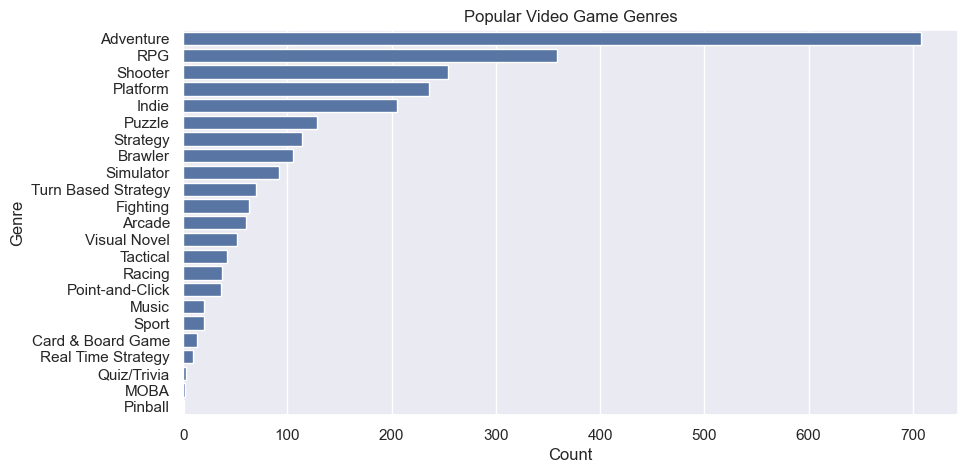

In [130]:
genre_count = df.explode('Genres').value_counts(subset='Genres')
plt.figure(figsize=(10,5))
plt.title("Popular Video Game Genres")
plt.ylabel("Genre")
plt.xlabel("Count")
sns.barplot(data=genre_count, orient='y')
plt.show()

2) How many video games were released each year?

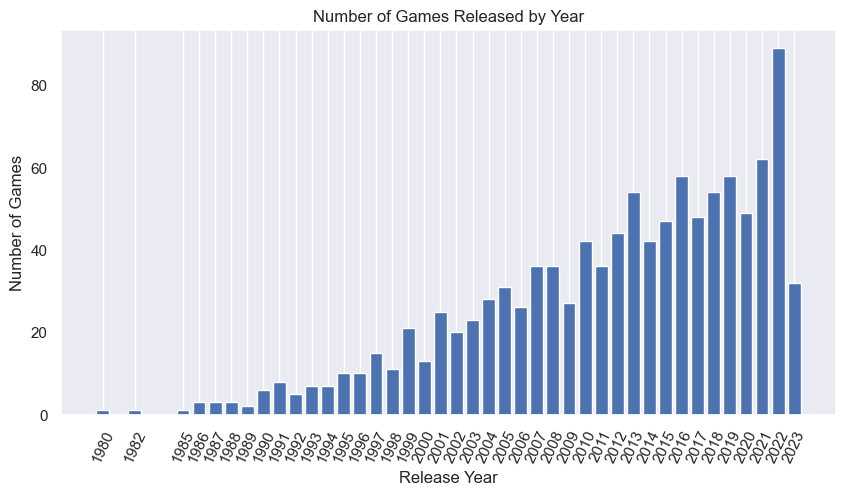

In [131]:
yearly_release = df.groupby('Release Year').size().reset_index(name='Number of Games')
plt.figure(figsize=(10, 5))
plt.bar(yearly_release['Release Year'], yearly_release['Number of Games'])
plt.title('Number of Games Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.grid(axis='y')
plt.xticks(yearly_release['Release Year'])
plt.xticks(rotation=65)
plt.show()

3) Looking at what the rating distribution is for all games.

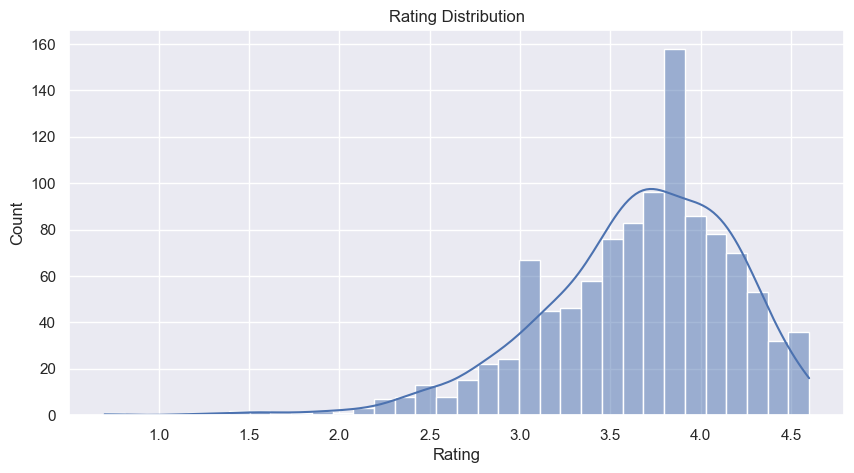

In [132]:
plt.figure(figsize=(10,5))
plt.title("Rating Distribution")
sns.set_theme(style='darkgrid')
sns.histplot(data=df, x='Rating', kde=True)
plt.show()

4. Comparing the ratings and how many plays a game has.

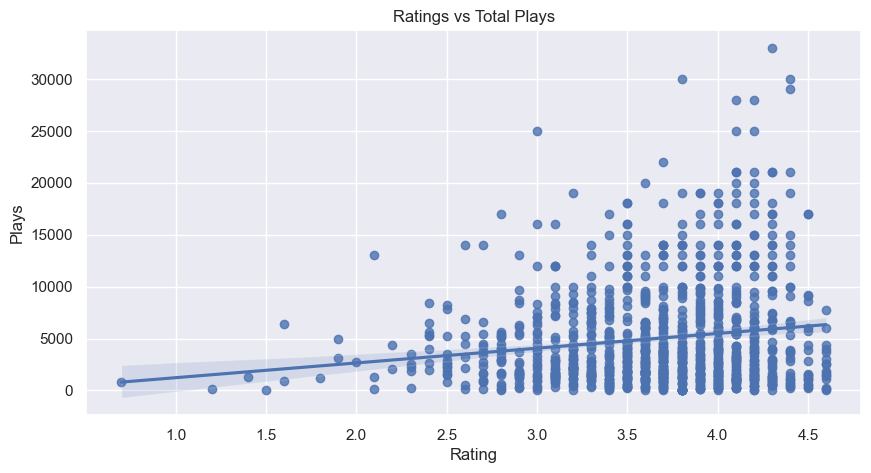

In [133]:
plt.figure(figsize=(10,5))
plt.title("Ratings vs Total Plays")
sns.regplot(x='Rating', y='Plays', data=df)
plt.show()

5) Which games are users playing right now and which ones do they keep on their game shelf unplayed? 

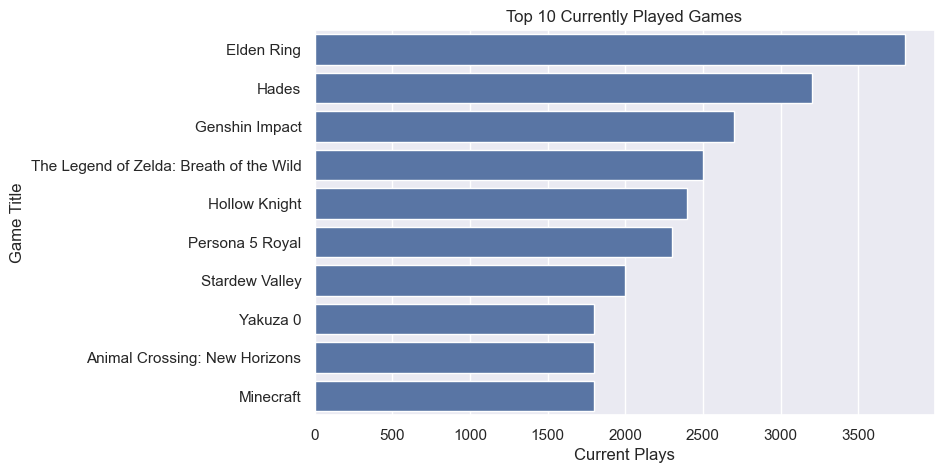

In [135]:
most_played = df.groupby('Title')['Playing'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.title("Top 10 Currently Played Games")
plt.xlabel("Current Plays")
plt.ylabel("Game Title")
sns.barplot(data=most_played, orient='y')
plt.show()

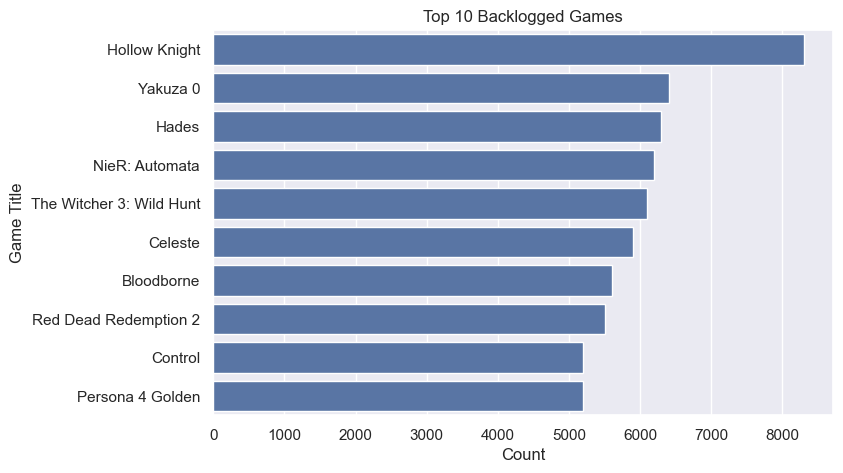

In [136]:
most_backlog = df.groupby('Title')['Backlogs'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.title("Top 10 Backlogged Games")
plt.xlabel("Count")
plt.ylabel("Game Title")
sns.barplot(data=most_backlog, orient='y')
plt.show()

6) What are the top 10 most wished for games?

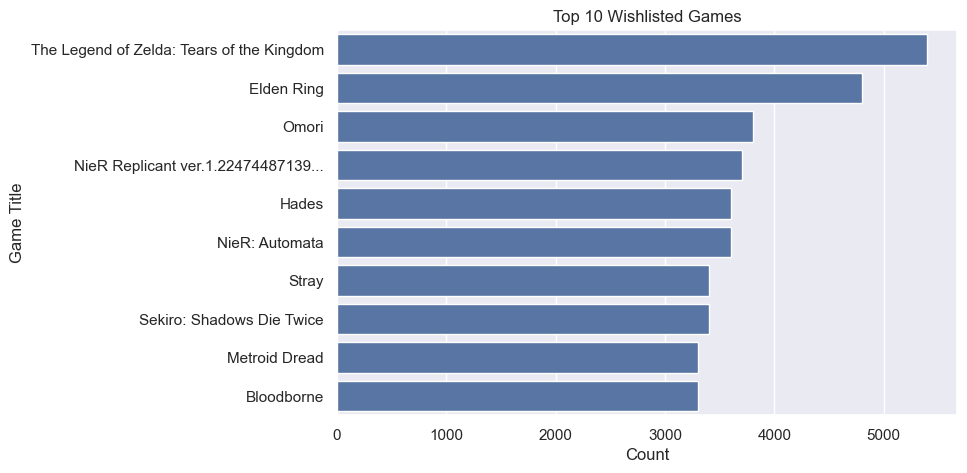

In [137]:
top_wishlist = df.groupby('Title')['Wishlist'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top_wishlist, orient='y')
plt.title("Top 10 Wishlisted Games")
plt.xlabel("Count")
plt.ylabel("Game Title")

plt.show()

7) What are the most played games and their ratings?

In [139]:
df2 = df.nlargest(10, ['Plays']).reset_index()

df2[['Title', 'Rating']]

,Title,Rating
0,Minecraft,4.3
1,The Legend of Zelda: Breath of the Wild,4.4
2,Grand Theft Auto V,3.8
3,Portal 2,4.4
4,Undertale,4.2
5,Portal,4.1
6,Among Us,3.0
7,Super Mario Odyssey,4.2
8,Super Smash Bros. Ultimate,4.1
9,The Elder Scrolls V: Skyrim,3.7


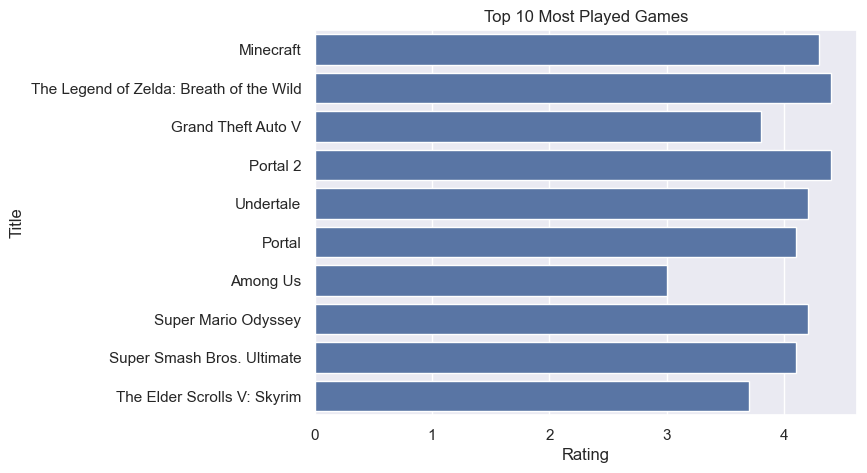

In [140]:
plt.figure(figsize=(7,5))
plt.title("Top 10 Most Played Games")
sns.barplot(data=df2, y='Title', x='Rating', orient='y')
plt.show()

8) How many users have the top 10 most played games on their wishlist?

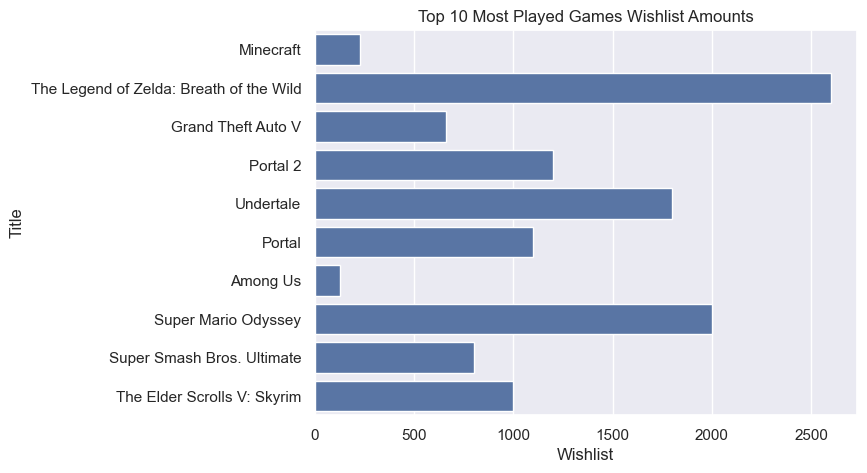

In [141]:
plt.figure(figsize=(7,5))
plt.title("Top 10 Most Played Games Wishlist Amounts")
sns.barplot(data=df2, y='Title', x='Wishlist', orient='y')
plt.show()

9. What are the top 20 rated games?

In [142]:
df.groupby('Title')['Rating'].max().sort_values(ascending=False).head(20)

Title
Hitman World of Assassination                 4.6
Metal Gear Solid 3: Snake Eater HD Edition    4.6
Final Fantasy XIV: Endwalker                  4.6
Tokyo Necro                                   4.6
Disco Elysium: The Final Cut                  4.6
Disco Elysium                                 4.6
Final Fantasy XIV: Shadowbringers             4.6
Umineko: When They Cry Chiru                  4.6
Sekiro: Shadows Die Twice - GOTY Edition      4.6
Half-Life: Alyx                               4.6
Metal Gear Solid 3: Subsistence               4.6
Bloodborne: Game of the Year Edition          4.6
Bloodborne: The Old Hunters                   4.6
Dwarf Fortress                                4.6
Outer Wilds                                   4.6
The Great Ace Attorney 2: Resolve             4.6
The Legend of Heroes: Trails to Azure         4.5
Mother 3                                      4.5
Witch on the Holy Night                       4.5
Silent Hill 2: Restless Dreams              

10) Which games have the most reviews left on them?

In [143]:
df.groupby('Title')['Number of Reviews'].max().sort_values(ascending=False).head(10)

Title
The Legend of Zelda: Breath of the Wild    4300.0
Elden Ring                                 3900.0
Undertale                                  3500.0
Bloodborne                                 3400.0
Hollow Knight                              3000.0
Final Fantasy VII                          2900.0
God of War                                 2900.0
Portal 2                                   2900.0
Hades                                      2900.0
Super Mario Odyssey                        2900.0
Name: Number of Reviews, dtype: float64

11) Comparing a game's rating to how many reveiws it has.

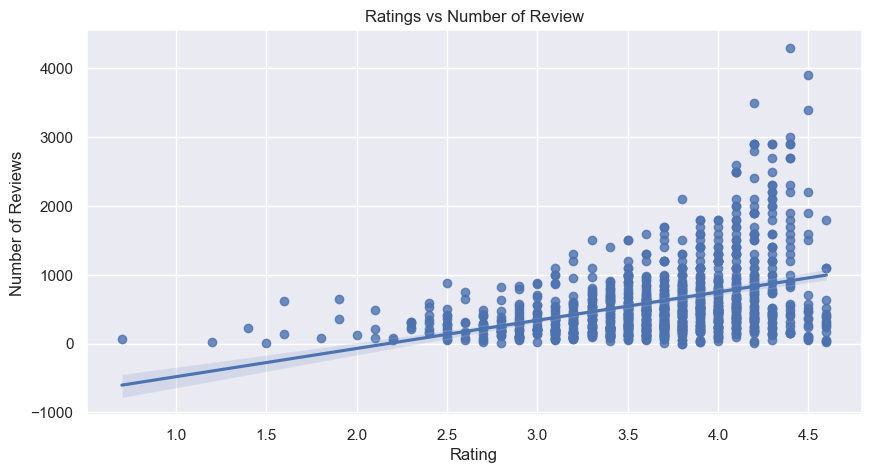

In [144]:
plt.figure(figsize=(10,5))
plt.title("Ratings vs Number of Review")
sns.regplot(x='Rating', y='Number of Reviews', data=df)
plt.show()

12) What is the average amount of plays based on the game's release year?

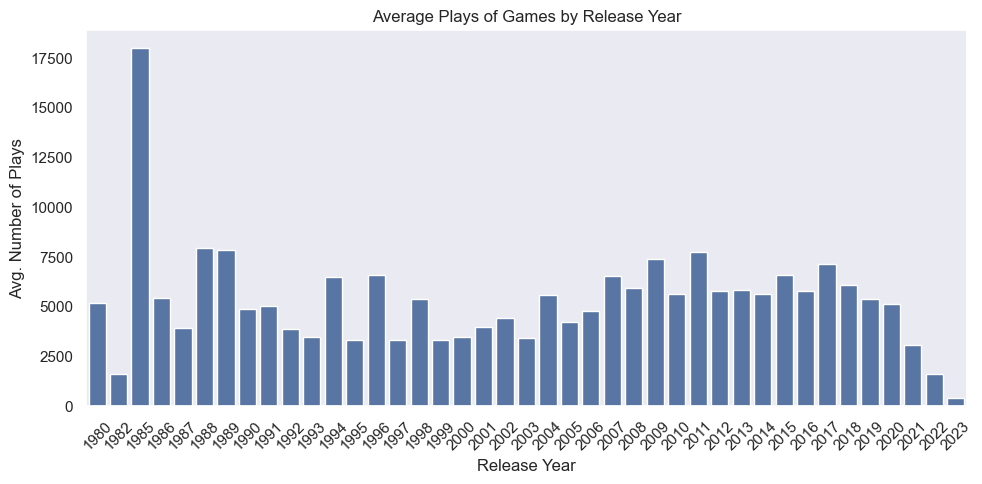

In [145]:
mean_plays_by_year = df.groupby('Release Year')['Plays'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=mean_plays_by_year.index, y=mean_plays_by_year.values)
plt.title('Average Plays of Games by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Avg. Number of Plays')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's see what game(s) were released in 1985.

In [146]:
df[df['Release Year'] == 1985]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist,Release Year
75,Super Mario Bros.,1985-09-13,"['Nintendo', 'Nintendo R&D4']",3.5,1500.0,1500.0,"[Adventure, Platform]",18000.0,59.0,733.0,237.0,1985


Just out of curiousity, what is the average rating for all games made by Nintendo.

In [147]:
nintendo = df[df['Team'].astype(str).apply(lambda x: 'Nintendo' in x)]
nintendo['Rating'].mean()

3.7694915254237285